# `This notebook is strictly just to visualize Decision Trees.`

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

### Basic reading csv

In [2]:
df=pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

### Train test split

In [4]:
y=df.pop('heart disease')
X=df
print(y.shape)
print(X.shape)

(270,)
(270, 4)


In [5]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(189, 4)
(81, 4)
(189,)
(81,)


### Building decision tree
Use all default parameters except depth to build a simple tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
import sklearn
sklearn.set_config(print_changed_only=False)

In [7]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [9]:
#Snippet to take your decision tree graph into an object and make an image from it.

#Libraries to plot the decision tree graph

from IPython.display import Image    #For any given structure you can draw an image
from six import StringIO
from sklearn.tree import export_graphviz  #graphviz object is what we plot as a graph.
import pydotplus, graphviz

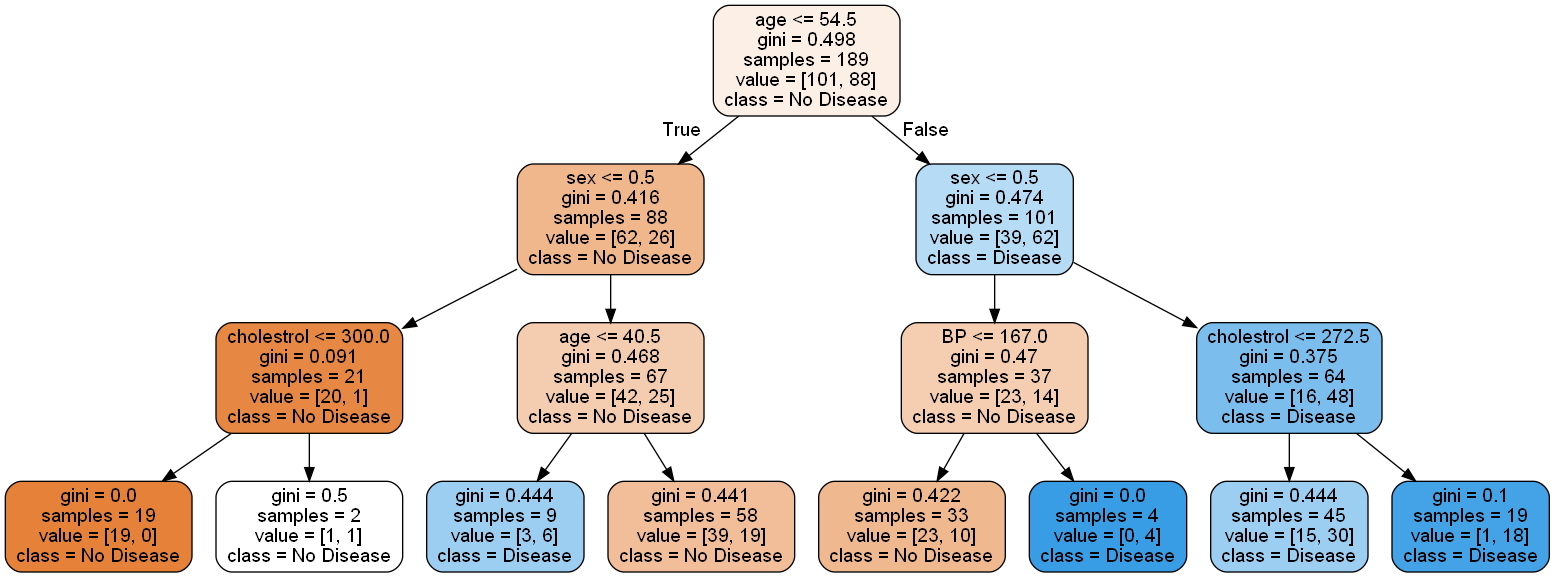

In [10]:
#Steps to plot a decision tree graph

#1. Instantiate a string dot data file
dot_data=StringIO()

#2. Create a graphviz object and put it into the dot file
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, 
               class_names=['No Disease', 'Disease'])

#Using the graphviz object, want to create a graph
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## `Using plot_tree`

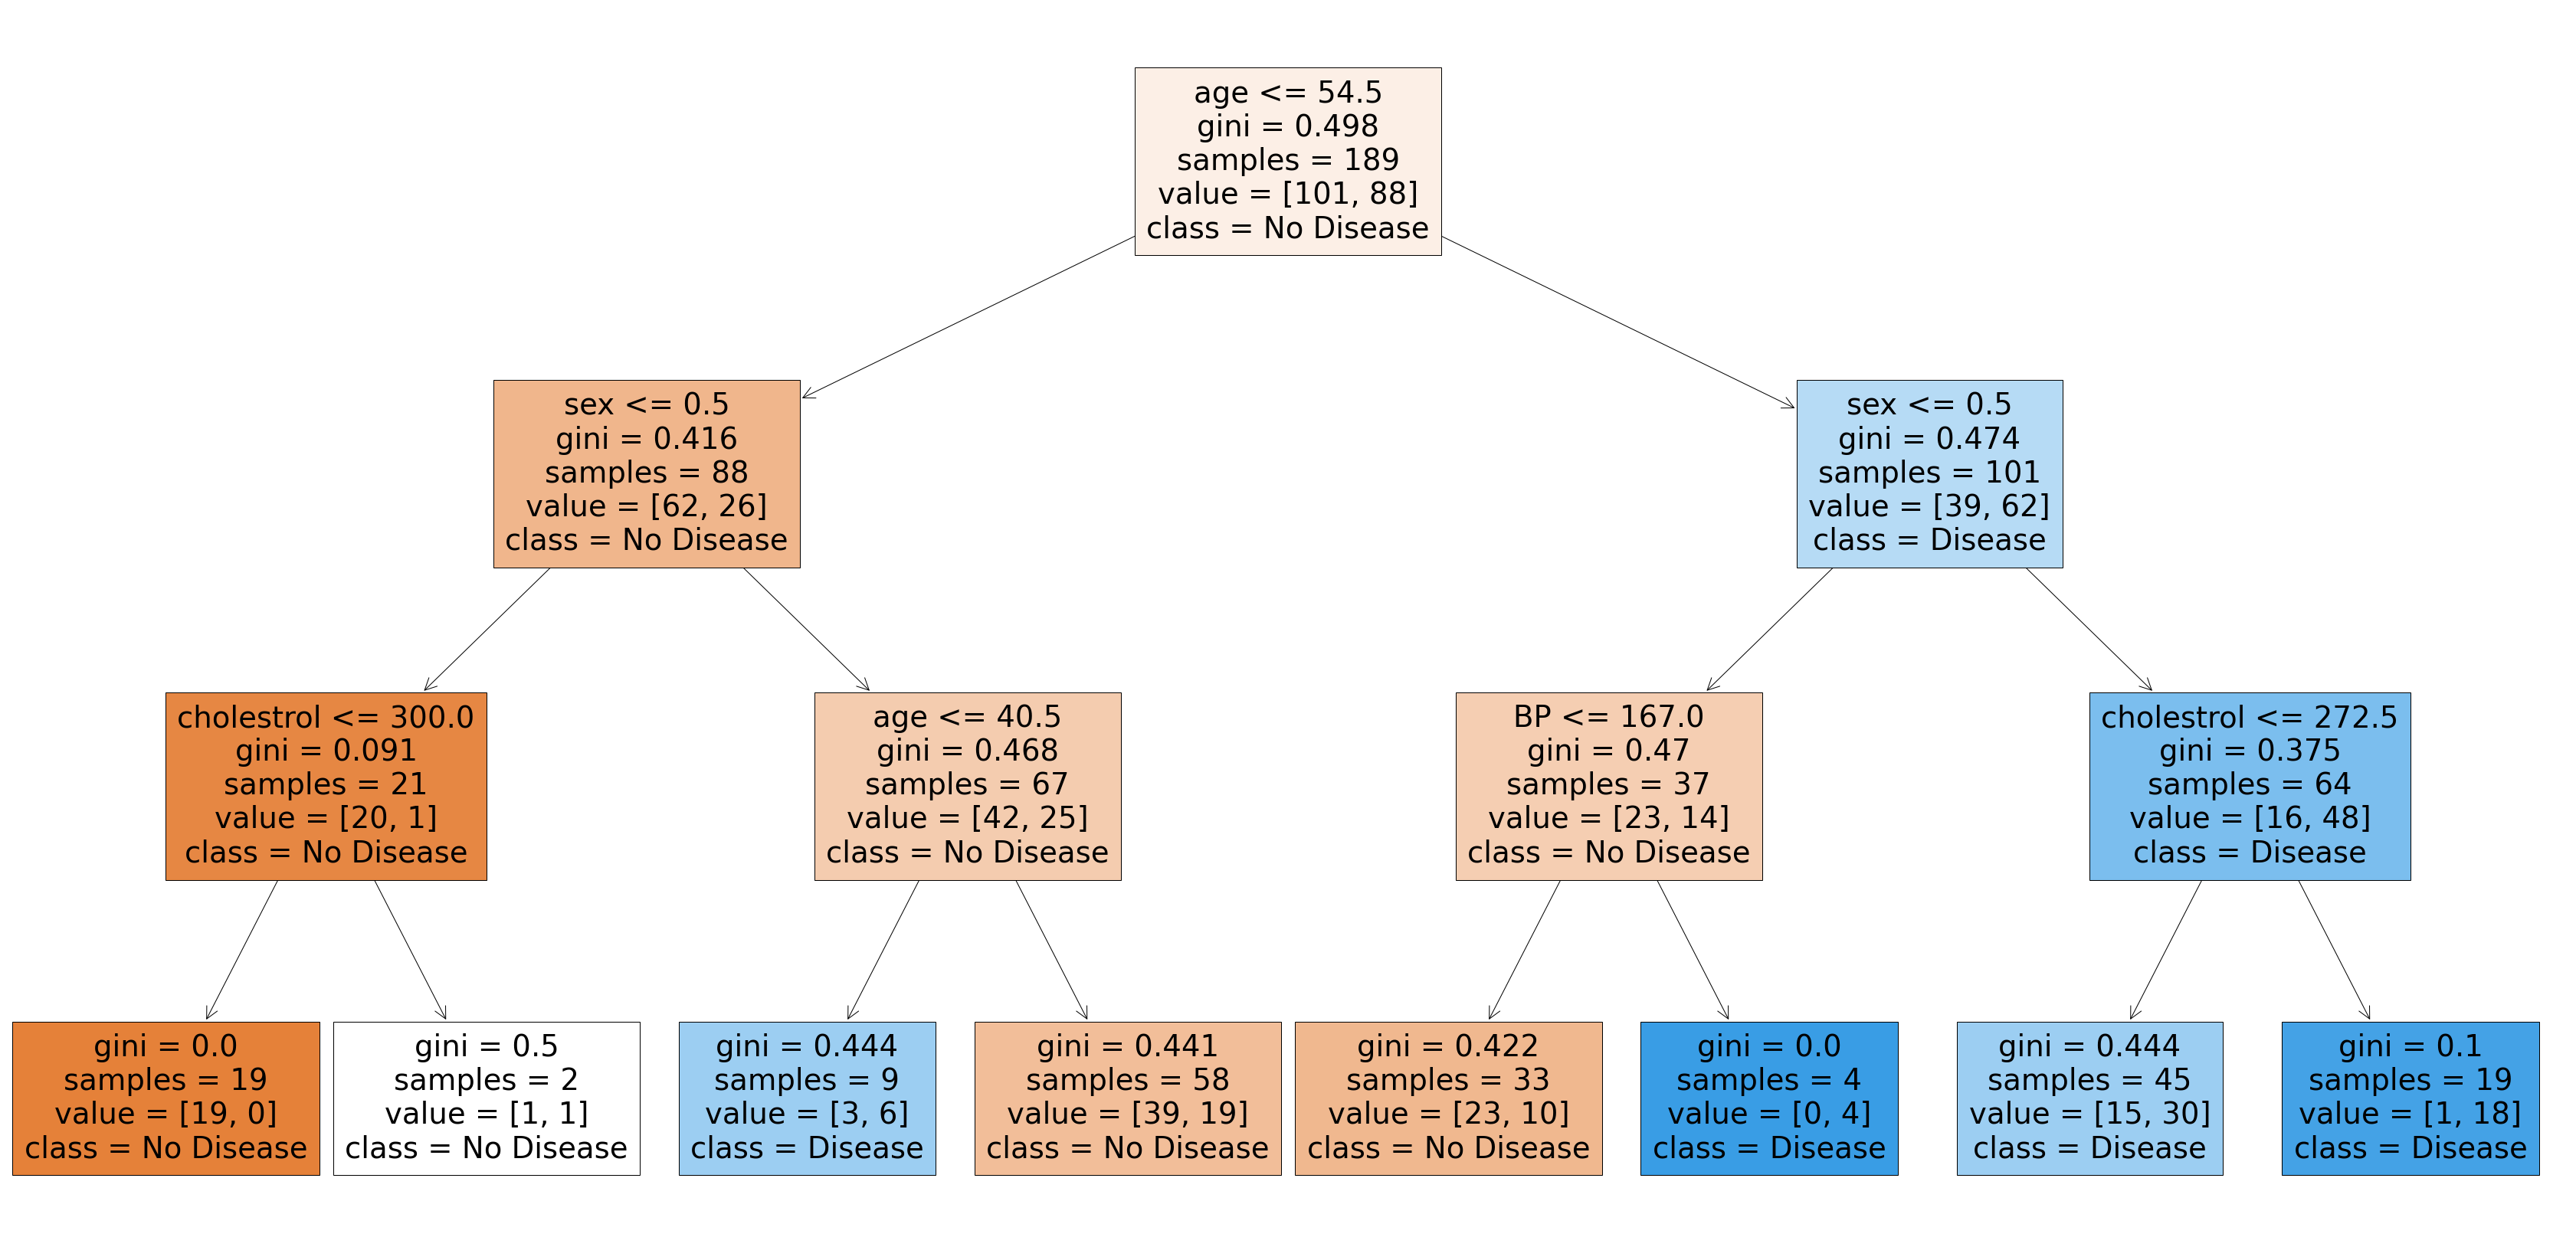

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True)
plt.show()

## `Evaluate the model with train and test set`

In [12]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [13]:
#Metrics to check effectiveness
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Train evaluation')
print(accuracy_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print('-----------------------------------------------')
print('Test evaluation')
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Train evaluation
0.7407407407407407
[[82 19]
 [30 58]]
-----------------------------------------------
Test evaluation
0.6049382716049383
[[35 14]
 [18 14]]


`Since Hyper parameter tuning in Decision Tress is done with trial and error to avoid overfitting, creating functions that will perform the above atsks of creating graphs and evaluating models`

In [14]:
#Function to plot a decision tree

def get_dt_graph(dt_classifier):
    #1. Instantiate a string dot data file
    dot_data=StringIO()

    #2. Create a graphviz object and put it into the dot file
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, 
                   class_names=['No Disease', 'Disease'])

    #Using the graphviz object, want to create a graph
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [15]:
#Function to evaluate a model

def eval_model(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    
    print('Train evaluation')
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))

    print('-----------------------------------------------')
    print('Test evaluation')
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

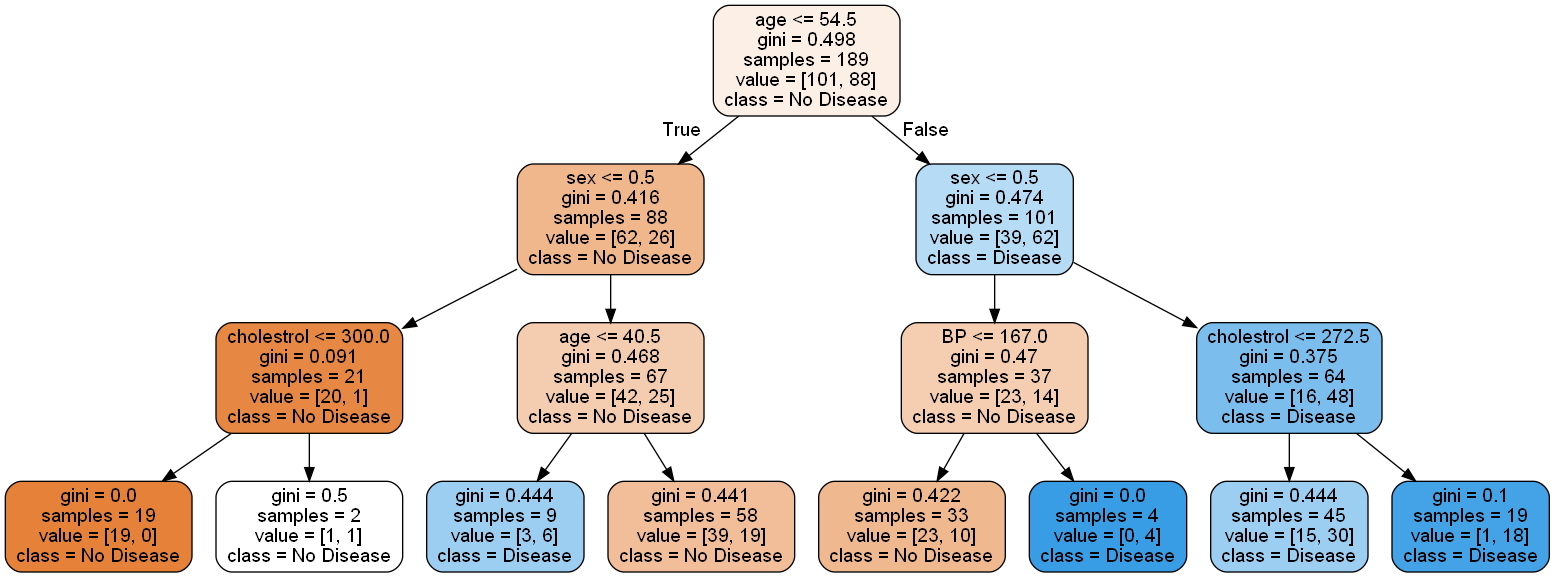

In [16]:
graph= get_dt_graph(dt)
Image(graph.create_png())

In [17]:
eval_model(dt)

Train evaluation
0.7407407407407407
[[82 19]
 [30 58]]
-----------------------------------------------
Test evaluation
0.6049382716049383
[[35 14]
 [18 14]]


`Let's try to make a decision tree without any hyper parameter- completely default.(The first DT had a hyperparameter num of depths)`

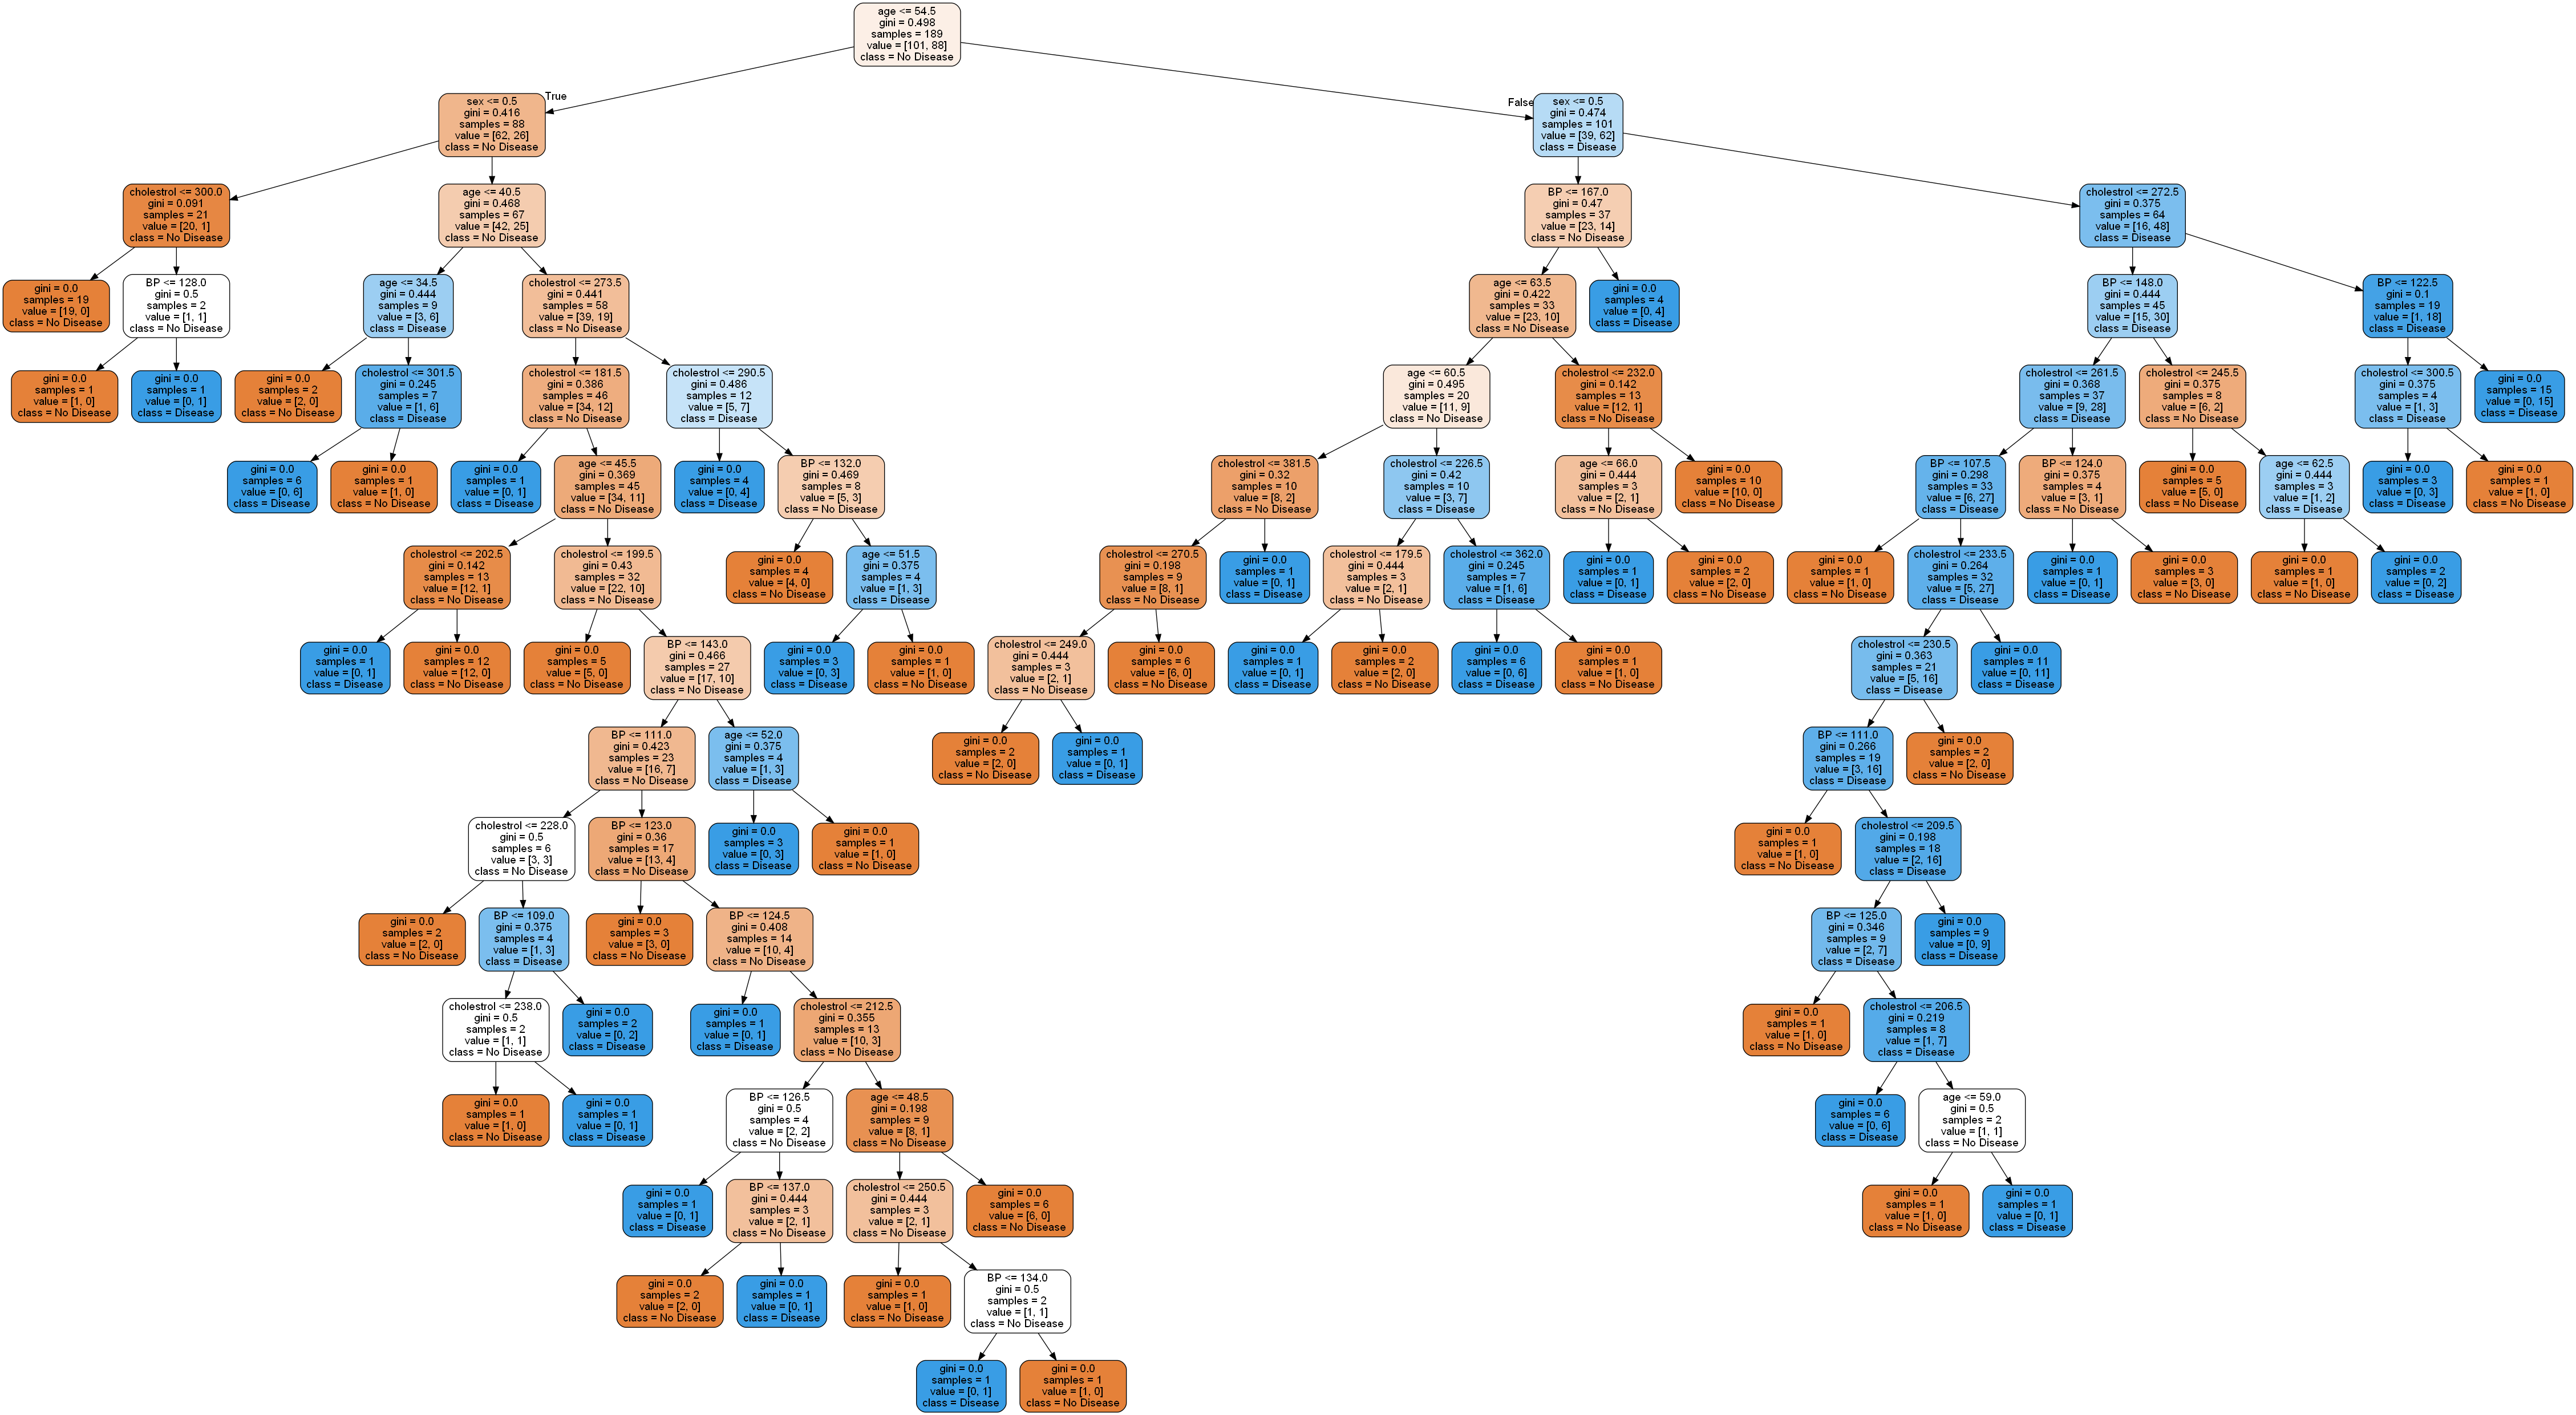

In [18]:
default_dt=DecisionTreeClassifier(random_state=42)
default_dt.fit(X_train, y_train)

graph2=get_dt_graph(default_dt)
Image(graph2.create_png())

In [19]:
eval_model(default_dt)

Train evaluation
1.0
[[101   0]
 [  0  88]]
-----------------------------------------------
Test evaluation
0.6296296296296297
[[31 18]
 [12 20]]


`Controlling the depth of the DT`

In [20]:
dt2=DecisionTreeClassifier(max_depth=3, random_state=42)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

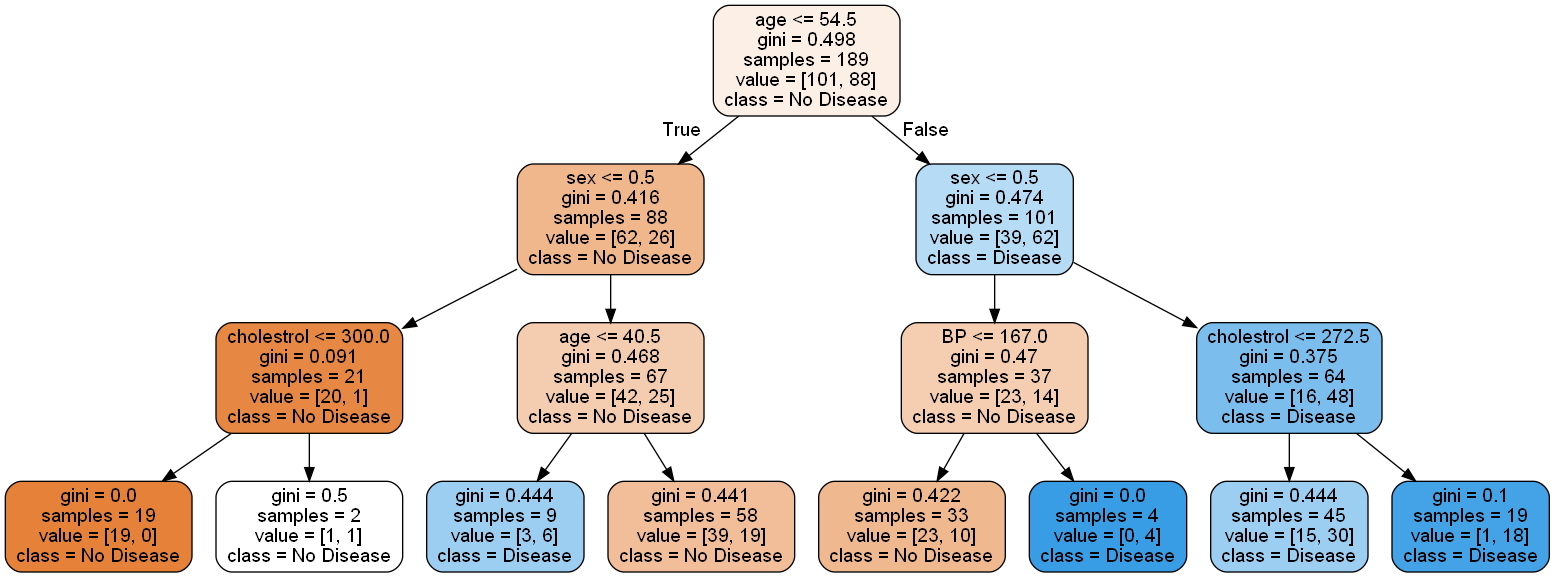

In [21]:
graph=get_dt_graph(dt2)
Image(graph.create_png())

In [22]:
eval_model(dt2)

Train evaluation
0.7407407407407407
[[82 19]
 [30 58]]
-----------------------------------------------
Test evaluation
0.6049382716049383
[[35 14]
 [18 14]]


`Specifying minimum number of samples before split in an internal node`

In [23]:
dt3=DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

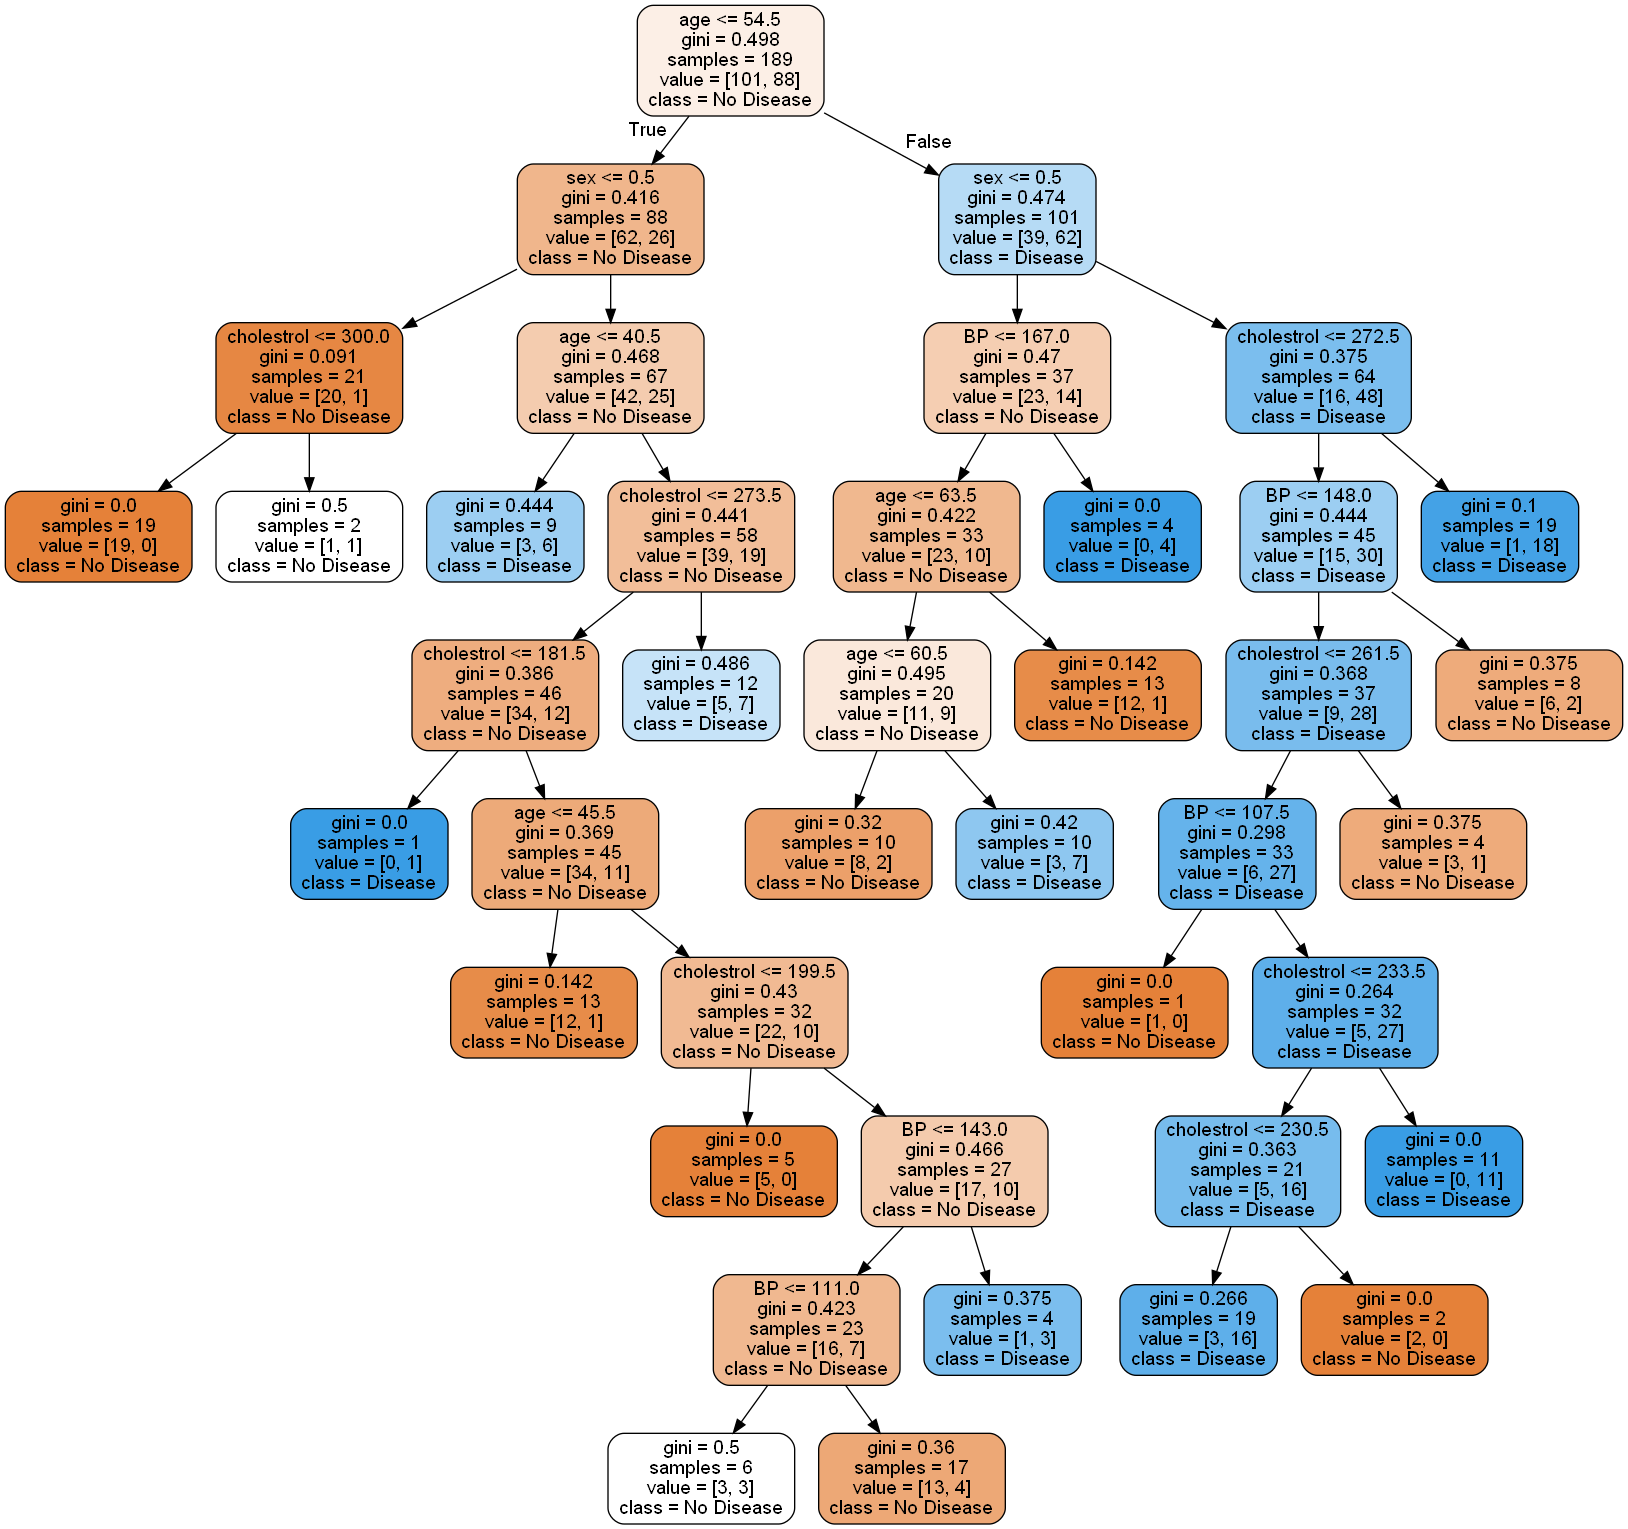

In [24]:
graph=get_dt_graph(dt3)
Image(graph.create_png())

In [25]:
eval_model(dt3)

Train evaluation
0.8359788359788359
[[85 16]
 [15 73]]
-----------------------------------------------
Test evaluation
0.6419753086419753
[[32 17]
 [12 20]]


`Specifying minimum number of samples in a leaf node`

In [26]:
dt4=DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

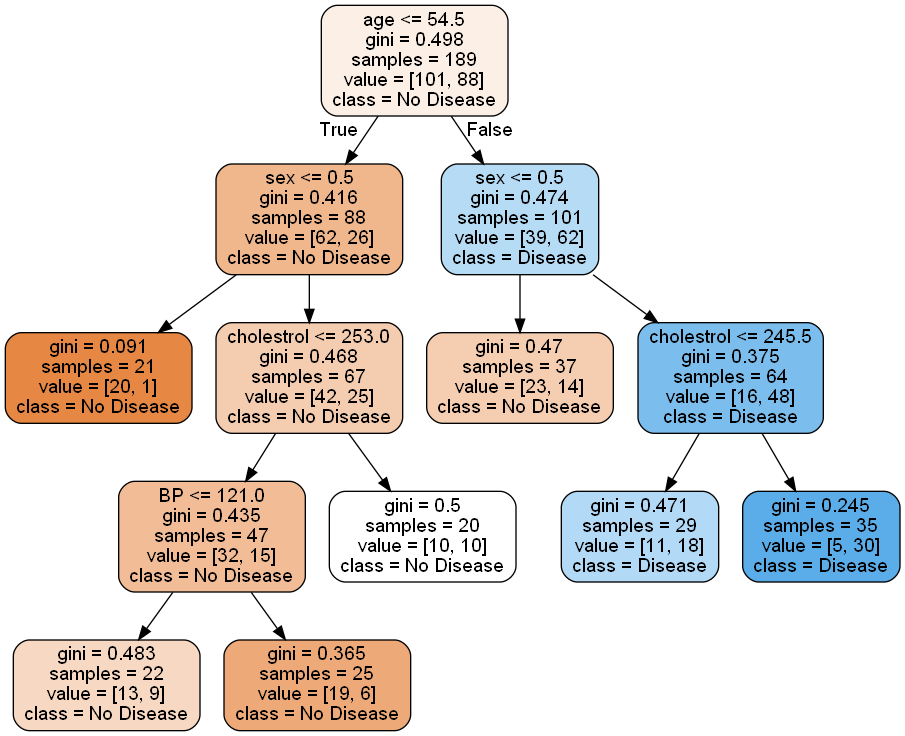

In [27]:
graph=get_dt_graph(dt4)
Image(graph.create_png())

In [28]:
eval_model(dt4)

Train evaluation
0.7037037037037037
[[85 16]
 [40 48]]
-----------------------------------------------
Test evaluation
0.6419753086419753
[[38 11]
 [18 14]]


`Using Entropy instead of Gini Index`

In [29]:
dt5=DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion='entropy')
dt5.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

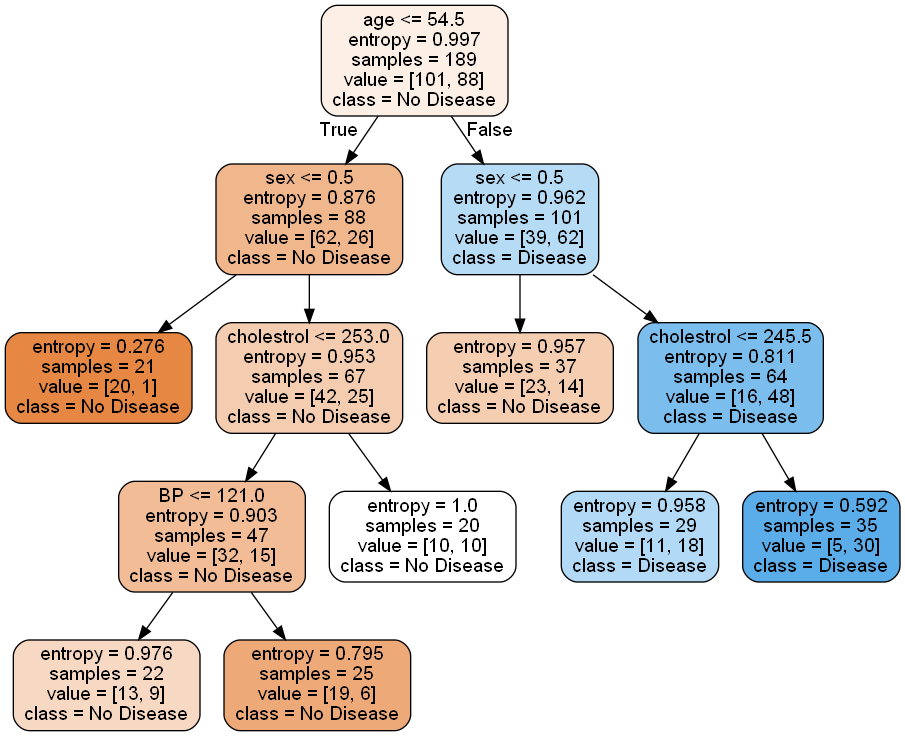

In [30]:
graph=get_dt_graph(dt5)
Image(graph.create_png())

In [31]:
eval_model(dt5)

Train evaluation
0.7037037037037037
[[85 16]
 [40 48]]
-----------------------------------------------
Test evaluation
0.6419753086419753
[[38 11]
 [18 14]]


# `Hyperparameter Tuning using GridsearchCv`

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
dt6=DecisionTreeClassifier(random_state=42)

In [34]:
params={
    'max_leaf_nodes': [5,6,7,8,9,10,15,20,30,50,100],
    'max_depth': [3,4,5,7,10,15,20],
    'criterion' : ['gini', 'entropy']
    }

In [35]:
grid_search=GridSearchCV(estimator=dt6,
            param_grid=params,
            n_jobs=-1,
            verbose=1,
            scoring='accuracy'
            )

In [36]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 154 candidates, totalling 770 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 770 out of 770 | elapsed:    3.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [37]:
dt_best=grid_search.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [38]:
eval_model(dt_best)

Train evaluation
0.7248677248677249
[[85 16]
 [36 52]]
-----------------------------------------------
Test evaluation
0.6296296296296297
[[37 12]
 [18 14]]


In [39]:
grid_result=pd.DataFrame(grid_search.cv_results_)
grid_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008036,0.001074,0.003989,0.000631,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.684211,0.710526,0.684211,0.631579,0.702703,0.682646,0.027540,31
1,0.009701,0.000543,0.004753,0.000518,gini,3,6,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.684211,0.710526,0.684211,0.605263,0.702703,0.677383,0.037508,46
2,0.009794,0.001586,0.004968,0.000913,gini,3,7,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.657895,0.710526,0.684211,0.605263,0.675676,0.666714,0.035100,66
3,0.008177,0.001716,0.004058,0.000713,gini,3,8,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.657895,0.710526,0.684211,0.605263,0.675676,0.666714,0.035100,66
4,0.006815,0.000465,0.004536,0.001224,gini,3,9,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.657895,0.710526,0.684211,0.605263,0.675676,0.666714,0.035100,66


In [40]:
grid_result=grid_result.sort_values(by='mean_test_score', ascending=False)
grid_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
67,0.006771,0.001171,0.004388,0.001492,gini,20,6,"{'criterion': 'gini', 'max_depth': 20, 'max_le...",0.684211,0.710526,0.710526,0.657895,0.72973,0.698578,0.02497,1
45,0.007196,0.001926,0.004381,0.000511,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'max_le...",0.684211,0.710526,0.710526,0.657895,0.72973,0.698578,0.02497,1
23,0.008589,0.001856,0.004790,0.000747,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.684211,0.710526,0.710526,0.657895,0.72973,0.698578,0.02497,1
34,0.009375,0.000797,0.005584,0.000487,gini,7,6,"{'criterion': 'gini', 'max_depth': 7, 'max_lea...",0.684211,0.710526,0.710526,0.657895,0.72973,0.698578,0.02497,1
12,0.008336,0.001057,0.004794,0.000740,gini,4,6,"{'criterion': 'gini', 'max_depth': 4, 'max_lea...",0.684211,0.710526,0.710526,0.657895,0.72973,0.698578,0.02497,1


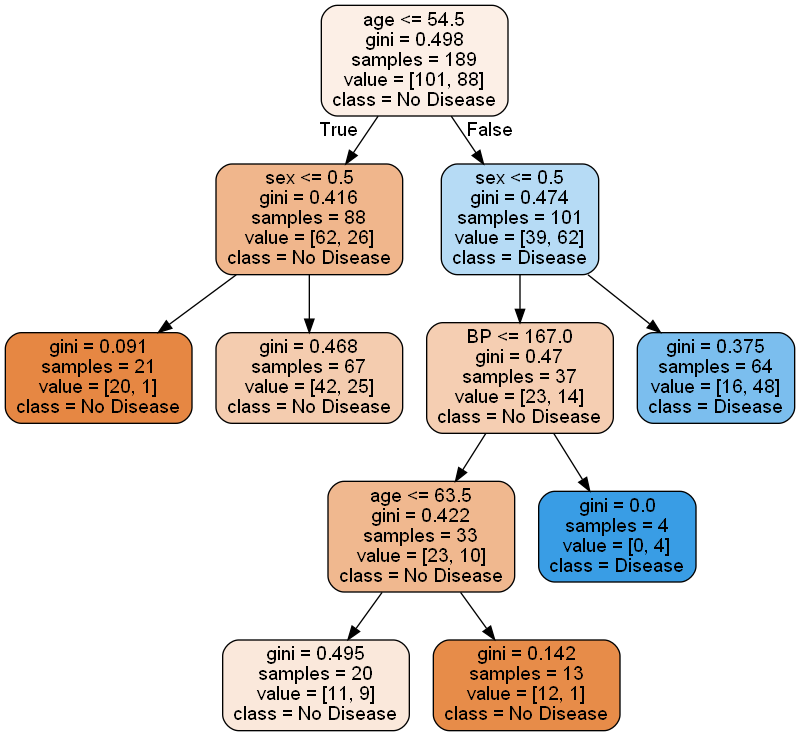

In [41]:
graph=get_dt_graph(dt_best)
Image(graph.create_png())